# Cobaya likelihood for CMB lensing cross-correlations

In [ ]:
import settings
import numpy as np
import yaml
from collections import OrderedDict

In [17]:
# Set up a simple dn/dz
z = np.linspace(0,4,401)
z0 = 1.0
dndz = 1./(2.*z0) * (z/z0)**2. * np.exp(-z/z0)
np.savetxt('input/dndz.txt',np.array([z,dndz]).T)

In [ ]:
# Set up a simple cosmology
info = OrderedDict({})
info['params'] = OrderedDict({})
info['params']['H0'] = 70.
info['params']['ombh2'] = 0.05*0.7**2.
info['params']['tau'] = 0.05
info['params']['mnu'] = 0.0
info['params']['nnu'] = 3.046
info['params']['num_massive_neutrinos'] = 0
info['params']['ns'] = 0.965
info['params']['SN'] = 1e-7

In [ ]:
# Sampled params
info['params']['logA'] = OrderedDict({})
info['params']['logA']['prior'] = OrderedDict({})
info['params']['logA']['prior']['min'] = 1.0
info['params']['logA']['prior']['max'] = 4.0
info['params']['logA']['ref'] = 3.05
info['params']['logA']['proposal'] = 0.1
info['params']['logA']['latex'] = '\log(10^{10} A_\mathrm{s})'
info['params']['logA']['drop'] = True

In [12]:
# Define As as a derived parameter
info['params']['As'] = OrderedDict({})
info['params']['As']['value'] = 'lambda logA: 1e-10*np.exp(logA)'
info['params']['As']['latex'] = 'A_\mathrm{s}'

info['params']['Omegam'] = OrderedDict({})
info['params']['Omegam']['prior'] = OrderedDict({})
info['params']['Omegam']['prior']['min'] = 0.1
info['params']['Omegam']['prior']['max'] = 0.9
info['params']['Omegam']['ref'] = 0.3
info['params']['Omegam']['proposal'] = 0.01
info['params']['Omegam']['latex'] = '\Omega_m'
info['params']['Omegam']['drop'] = True


info['params']['b1'] = OrderedDict({})
info['params']['b1']['prior'] = OrderedDict({})
info['params']['b1']['prior']['min'] = 0.0
info['params']['b1']['prior']['max'] = 10.0
info['params']['b1']['ref'] = 1.0
info['params']['b1']['proposal'] = 0.1
info['params']['b1']['latex'] = r'b1'

# Define omch2 and sigma8 as derived parameters
#info['params']['omch2'] =  {}
#info['params']['omch2']['derived'] = True
#info['params']['omch2']['external'] = "importlib.import_module('settings').get_omch2",
#info['params']['sigma8'] = {}
#info['params']['sigma8']['derived'] = True
#info['params']['sigma8']['latex'] = r'\sigma_8'

/global/cscratch1/sd/akrolew/xcorr_light/settings.py:825: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  info = yaml.load(open('input/likelihood_info.yaml','r'))


In [ ]:
info['likelihood'] = settings.likelihood_block
info['theory'] = settings.theory_block
info['sampler'] = OrderedDict({})
info['sampler']['minimize'] = settings.minimize_block
info['modules'] = settings.modules_path
info['output'] = settings.output_name + '_minimize'
info['timing'] = True
info['resume'] = True

In [ ]:
yaml.dump(info, open('input/likelihood_info.yaml','w'))

# Make some test power spectra using the cosmology and parameters from above

In [13]:
!sbatch make_test_cls.sh

Submitted batch job 35972594


# Find the maximum likelihood, to be used as a starting point for the MCMC chain

In [14]:
!sbatch minimize.sh

Submitted batch job 35972665


# Run the MCMC chains

In [16]:
!sbatch chains.sh

Submitted batch job 35973042


In [ ]:
# Make contour plots, trace plots, comparison of best-fit and data

In [ ]:
!sbatch validation.sh

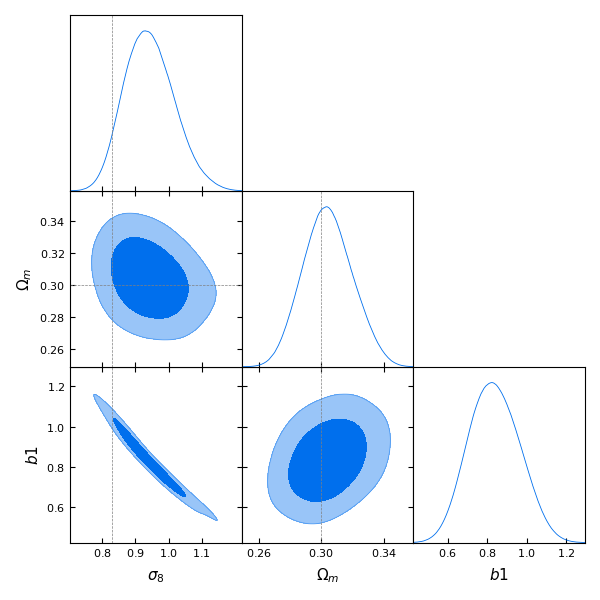

In [2]:
from IPython.display import Image
Image("plots/analytic_test/contours.png")

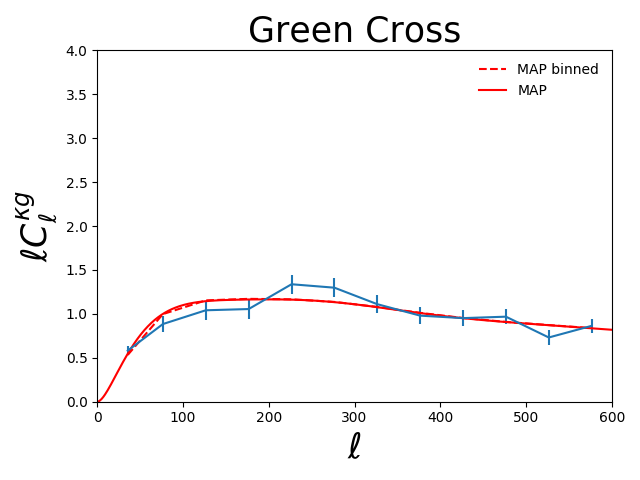

In [3]:
Image("plots/analytic_test/clkg.png")

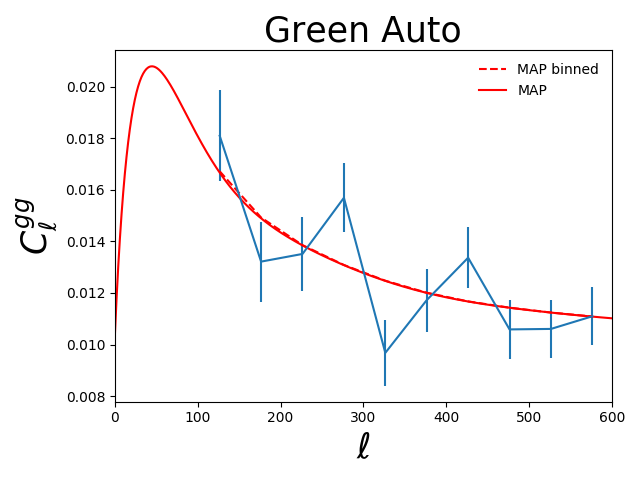

In [11]:
Image("plots/analytic_test/clgg.png")

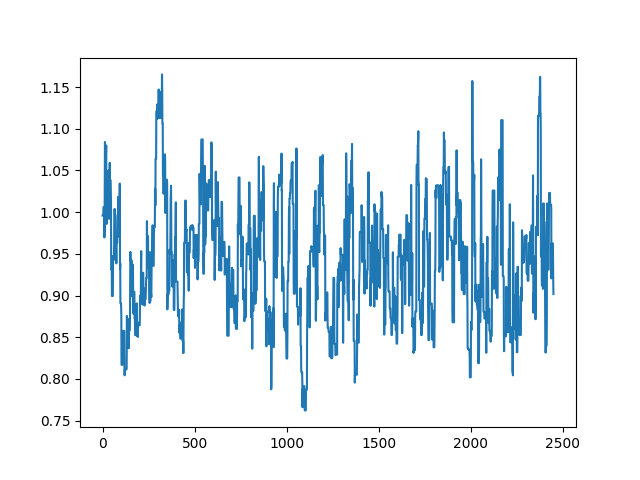

In [5]:
Image("plots/analytic_test/trace/sigma8.png")

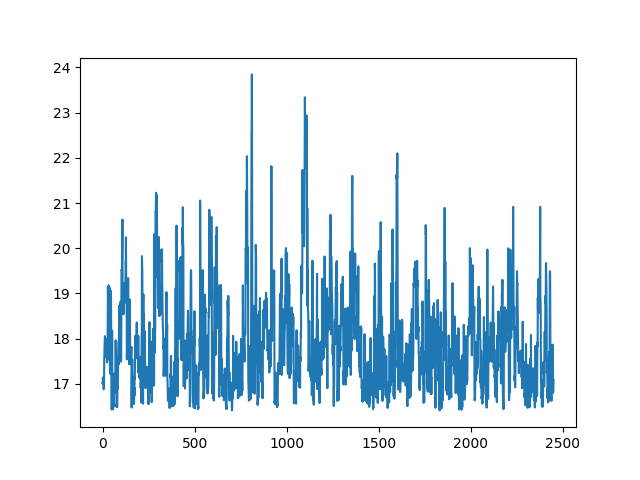

In [6]:
Image("plots/analytic_test/trace/logpost.png")

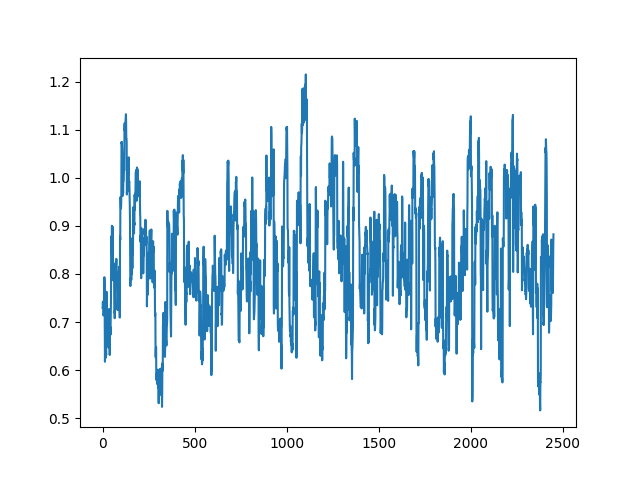

In [7]:
Image("plots/analytic_test/trace/b1.png")

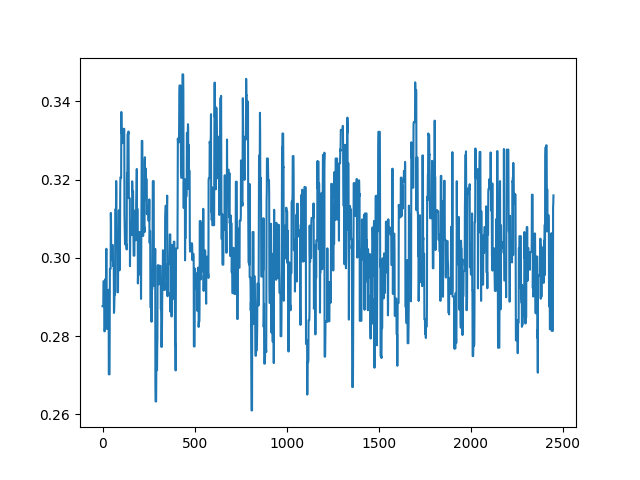

In [8]:
Image("plots/analytic_test/trace/Omegam.png")

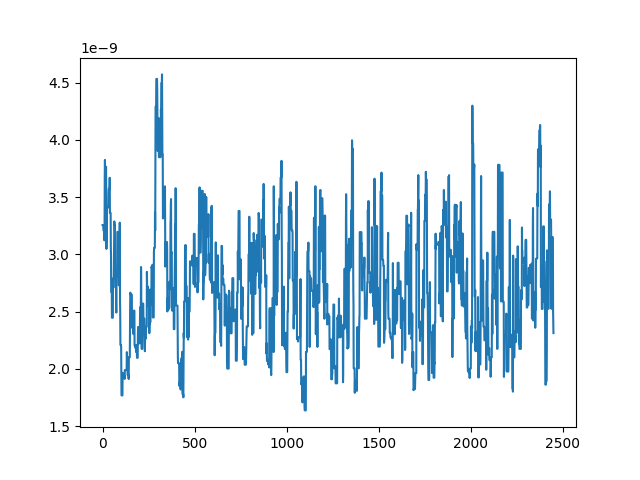

In [9]:
Image("plots/analytic_test/trace/As.png")